# Symmetry resolved spectra.
Plot the points in the spectrum resolved with some information on their quantum numbers.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append('../python_data/')
from ed_result_wrapper import EDResult

data_dir = "/home/lukas/_TEMP_fqlm/"


def _select_close(cond, df, atol=1e-8):
    """ Selects rows of df if they are close to all conditions in the 
        cond dictionary.
    
        Use with caution!
    
        Note:
         -  The numerical tolerance for closenes is toggled via atol. 
            The standard is 1e-8 (in fact, by numpy) but this could 
            lead to problems when comparing very small numbers.
            
    """
    m = sub.apply(lambda r: all([np.isclose(r[o], v, atol=atol) for o, v in cond.items()]), axis=1)
    return df[m]

## 2x2x2 systems

ED results for datafile '/home/lukas/_TEMP_fqlm//results_bosons_wx_2-wy_2-wz_2_2x2x2.hdf5'
ED results for datafile '/home/lukas/_TEMP_fqlm//results_bosons_wx_2-wy_2-wz_3_2x2x2.hdf5'


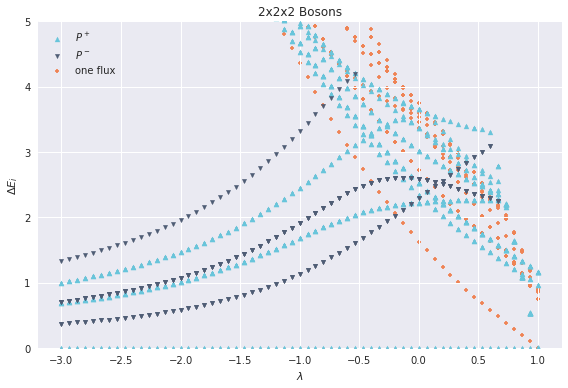

In [29]:
# Choose the dataset.
param = {
    'L' : [2,2,2],
    'gp' : 'bosons',
#     'ws' : 'wx_2-wy_2-wz_2'
    'ws' : [0,0,0]
}
res_000 = EDResult(param, data_dir)
res_000.compute_gap()
df = res_000.get_eigenvalues()

# Select only the lowest states.
n_states = 25
sub = df[df['N']<n_states]


dependency = 'lambda'
observable = 'delta_e'
with plt.style.context('seaborn'):
    fig, bx = plt.subplots()
#     fig.set_size_inches(12, 6)
    
    # All points.
    bx.scatter(sub[dependency], sub[observable], marker='.', color='gray', alpha=0.5, zorder=0, s=20)
    
    # Highlight some.
    sets = [
        (
            {'parity': 1, 'unity': 1}, 
            {"color":"#68C5DB", 'marker':'^', 'label':'$P^+$', 's':25}
        ),        
        (
            {'parity': -1}, 
            {"color":"#4F5D75", 'marker':'v', 'label':'$P^-$', 's':20}
        )
    ]
    for cond, style in sets:
        red = _select_close(cond, sub)
        bx.scatter(red[dependency], red[observable], **style)
    
    # ---
    # Other winding sectors.
    param.update({'ws': [0,0,1]})
    res_winding = EDResult(param, data_dir)
    
    # Get the gap.
    res_winding.compute_gap(gs=res_000.get_gs())

    # Get the lowest states.
    df = res_winding.get_eigenvalues()
    sub = df[df['N']<10]
    
    bx.scatter(sub[dependency], sub[observable], marker='+', color='#EF8354', zorder=0, s=20, label='one flux')
        
    # ---
        
    bx.set_xlabel('$\\lambda$')
    bx.set_ylabel('$\\Delta E_i$')
    bx.set_ylim(0, 5)

    bx.legend(loc='upper left')
    bx.set_title('2x2x2 Bosons')
    
    fig.tight_layout()
    fig.savefig('parity_2x2x2.png')

ED results for datafile '/home/lukas/_TEMP_fqlm//results_bosons_wx_2-wy_2-wz_2_2x2x2.hdf5'


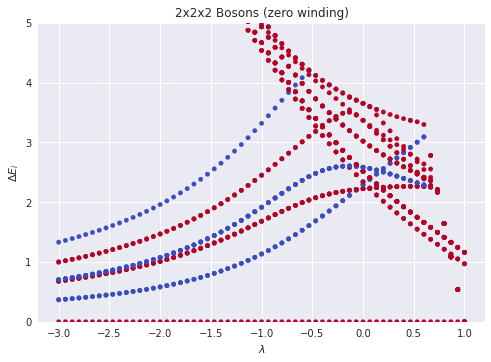

In [23]:
from matplotlib import cm


# Choose the dataset.
param = {
    'L' : [2,2,2],
    'gp' : 'bosons',
#     'ws' : 'wx_2-wy_2-wz_2'
    'ws' : [0,0,0]
}
res_000 = EDResult(param, data_dir)
res_000.compute_gap()
df = res_000.get_eigenvalues()

# Select only the lowest states.
n_states = 25
sub = df[df['N']<n_states]


dependency = 'lambda'
observable = 'delta_e'
with plt.style.context('seaborn'):
    fig, bx = plt.subplots()
#     fig.set_size_inches(12, 6)
    
    # All points.
    bx.scatter(
        sub[dependency], sub[observable], c=sub["parity"].values.real, cmap=cm.coolwarm,
        marker='o', s=20
    )
            
    # ---
        
    bx.set_xlabel('$\\lambda$')
    bx.set_ylabel('$\\Delta E_i$')
    bx.set_ylim(0, 5)

#     bx.legend(loc='upper left')
    bx.set_title('2x2x2 Bosons (zero winding)')

### 2x2x4 Bosons

ED results for datafile '/home/lukas/_TEMP_fqlm//results_bosons_wx_4-wy_4-wz_2_2x2x4.hdf5'
ED results for datafile '/home/lukas/_TEMP_fqlm//results_bosons_wx_5-wy_4-wz_2_2x2x4.hdf5'


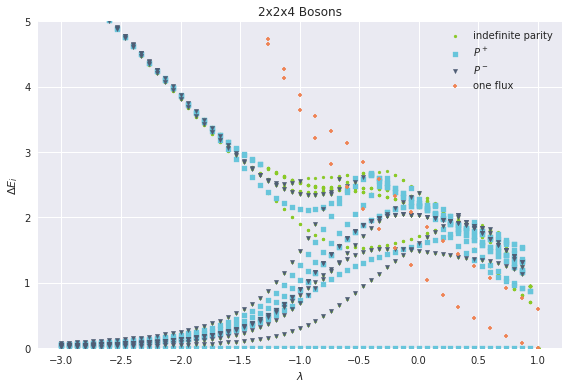

In [78]:
# Choose the dataset.
param = {
    'L' : [2,2,4],
    'gp' : 'bosons',
    'ws' : [0,0,0]
}
res_000 = EDResult(param, data_dir)
res_000.compute_gap()
df = res_000.get_eigenvalues()

# Select only the lowest states.
n_states = 25
sub = df[df['N']<n_states]


dependency = 'lambda'
observable = 'delta_e'
with plt.style.context('seaborn'):
    fig, bx = plt.subplots()
#     fig.set_size_inches(12, 6)
    
    # All points.
    bx.scatter(sub[dependency], sub[observable], marker='.', color='#8AC926', alpha=1, zorder=1, s=35, label='indefinite parity')
    
    # Highlight some.
    sets = [
        (
            {'parity': 1, 'unity': 1}, 
            {"color":"#68C5DB", 'marker':'s', 'label':'$P^+$', 's':25}
        ),        
        (
            {'parity': -1}, 
            {"color":"#4F5D75", 'marker':'v', 'label':'$P^-$', 's':20}
        )
    ]
    for cond, style in sets:
        red = _select_close(cond, sub)
        bx.scatter(red[dependency], red[observable], **style)
        
    # ---
    # Other winding sectors.
    param.update({'ws': [1,0,0]})
    res_winding = EDResult(param, data_dir)
    
    # Get the gap.
    res_winding.compute_gap(gs=res_000.get_gs())

    # Get the lowest states.
    df = res_winding.get_eigenvalues()
    sub = df[df['N']<10]
    
    bx.scatter(sub[dependency], sub[observable], marker='+', color='#EF8354', s=20, label='one flux')
        
    # ---
        
    bx.set_xlabel('$\\lambda$')
    bx.set_ylabel('$\\Delta E_i$')
    bx.set_ylim(0, 5)

    bx.legend(loc='upper right')
    bx.set_title('2x2x4 Bosons')
    
    fig.tight_layout()
    fig.savefig('parity_2x2x4.png')

ED results for datafile '/home/lukas/_TEMP_fqlm//results_bosons_wx_4-wy_4-wz_2_2x2x4.hdf5'
ED results for datafile '/home/lukas/_TEMP_fqlm//results_bosons_wx_5-wy_4-wz_2_2x2x4.hdf5'
ED results for datafile '/home/lukas/_TEMP_fqlm//results_bosons_wx_4-wy_4-wz_3_2x2x4.hdf5'


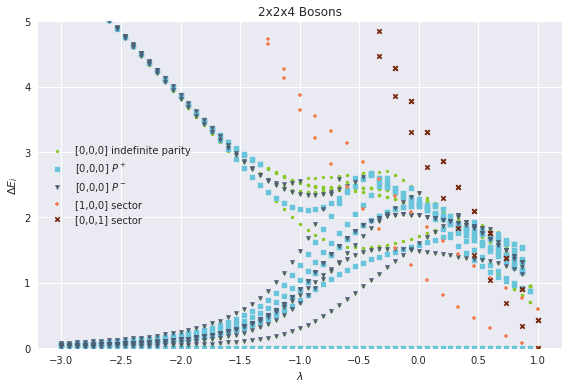

In [95]:
# Choose the dataset.
param = {
    'L' : [2,2,4],
    'gp' : 'bosons',
    'ws' : [0,0,0]
}
res_000 = EDResult(param, data_dir)
res_000.compute_gap()
df = res_000.get_eigenvalues()

# Select only the lowest states.
n_states = 25
sub = df[df['N']<n_states]


dependency = 'lambda'
observable = 'delta_e'
with plt.style.context('seaborn'):
    fig, bx = plt.subplots()
#     fig.set_size_inches(12, 6)
    
    # All points.
    bx.scatter(sub[dependency], sub[observable], marker='.', color='#8AC926', alpha=1, zorder=1, s=35, label='[0,0,0] indefinite parity')
    
    # Highlight some.
    sets = [
        (
            {'parity': 1, 'unity': 1}, 
            {"color":"#68C5DB", 'marker':'s', 'label':'[0,0,0] $P^+$', 's':25}
        ),        
        (
            {'parity': -1}, 
            {"color":"#4F5D75", 'marker':'v', 'label':'[0,0,0] $P^-$', 's':20}
        )
    ]
    for cond, style in sets:
        red = _select_close(cond, sub)
        bx.scatter(red[dependency], red[observable], **style)
        
    # ---
    # Other winding sectors.
    
    n_ws_states = 10
    ws_sets = {
        (1,0,0) : {'marker':'+', 'color':'#EF8354', 's':20},
        (0,0,1) : {'marker':'x', 'color':'#78290F', 's':20}
    }
    for ws, ws_style in ws_sets.items():
        param.update({'ws': ws})
        res_winding = EDResult(param, data_dir)

        # Get the gap.
        res_winding.compute_gap(gs=res_000.get_gs())

        # Get the lowest states.
        df = res_winding.get_eigenvalues()
        sub = df[df['N']<n_ws_states]

        bx.scatter(sub[dependency], sub[observable], **ws_style, label='[{:d},{:d},{:d}] sector'.format(*param['ws']))
        
    # ---
        
    bx.set_xlabel('$\\lambda$')
    bx.set_ylabel('$\\Delta E_i$')
    bx.set_ylim(0, 5)

    bx.legend(loc='center left')
    bx.set_title('2x2x4 Bosons')
    
    fig.tight_layout()
    fig.savefig('parity_2x2x4.png')